In [109]:
# Program    : Pemodelan Inversi kuadrat Terkecil
# Spesifikasi: Inverse UAS no 1
# Versi      : 1.0
# Last Edited: 2022-12-07
# Programmer : Sabda Wahidatulhusna
import numpy as np
import matplotlib.pyplot as plt


In [110]:
Xsoal=[-500,-425,350,-275,-200,-125,-50,25,100,175,250,325,400,475]
Xi=[]
for i in range(len(Xsoal)):
    Xasli= -500 -Xsoal[i]
    Xi.append(Xasli)

Xi= np.array(Xi)
Xi= abs(Xi)
dobs=[0.0425,0.0540,0.0910,0.1517,0.2244,0.3725,0.6037,1.0675,1.5797,1.7118,1.2544,0.7637,0.4422,0.2612]
dobs = np.array(dobs)
Zi= np.zeros(len(Xi))
rho=2500

print(Xi)

[  0  75 850 225 300 375 450 525 600 675 750 825 900 975]


In [111]:
def graviti(Xi,Zi,Xc,Zc,R,rho):
    G = 6.674*(10**(-11))
    grav = (G*(4/3)*3.14*(R**3)*rho*Zc)/(((Xi-Xc)**2+(Zi-Zc)**2)**(3/2))*10**5
    return grav

In [112]:
#Model Awal
iterasi = 1
mat_iterasi = []
Erms = 1
mat_Erms = []
X_model_awal = 200
Z_model_awal = 150
R_model_awal = 125
error = np.infty
G = 6.674*(10**(-11))

In [113]:
#Melakukan inversi non-linier
while Erms >= 0.01:
    if iterasi == 1:
        X_model = X_model_awal
        Z_model = Z_model_awal
        R_model = R_model_awal
    elif iterasi == 4:
        break
    else :
        X_model = X_Koreksi
        Z_model = Z_Koreksi
        R_model = R_koreksi
    mat_iterasi.append(iterasi)
    dcal= graviti(Xi,Zi,X_model,Z_model,R_model,rho)
    misfit = dobs-dcal
    Erms = np.sqrt((1/len(dobs))*sum((misfit)**2))
    
    u = G*(4/3*3.14*(R_model**3)*rho)
    v = (3*Z_model*(Xi-X_model))*10**5
    uv= ((Xi-X_model)**2+(Zi-Z_model)**2)**(5/2)
    vu= (Xi**2+Zi*Z_model+Xi**2-2*Xi*X_model-2*Z_model**2+X_model**2)*10**5
    derivativex=(u*v)/uv
    derivativez=(u*vu)/uv
    derivativer= (G*(4/3)*3.14*(3*R_model**2)*rho*Z_model)/(((Xi-X_model)**2+(Zi-Z_model)**2)**(3/2))*10**5
    J=[]
    for i in range(len(Xi)):
        j=[derivativex[i],derivativez[i],derivativer[i]]
        J.append(j)
    J=np.array(J)
    Jtrans=np.transpose(J)
    JJinv=np.linalg.inv(np.dot(Jtrans,J))
    Jd=np.dot(Jtrans,np.transpose(misfit))
    deltaM= np.dot(JJinv,Jd)

    X_Koreksi = X_model+deltaM[0]
    Z_Koreksi = Z_model+deltaM[1]
    R_koreksi = R_model+deltaM[2]
    iterasi+=1
    mat_Erms.append(Erms)
    print('-' * 50)
    print("X model =",X_model)
    print("Z model = ",Z_model)
    print("R_model =",R_model)
    print("Erms = ",Erms)
    print("Iterasi = ",iterasi)


--------------------------------------------------
X model = 200
Z model =  150
R_model = 125
Erms =  2.0685500877894243
Iterasi =  2
--------------------------------------------------
X model = 186.90648878292444
Z model =  168.02957621633726
R_model = 84.40320513806346
Erms =  0.8869569179249304
Iterasi =  3
--------------------------------------------------
X model = 90.25462751941744
Z model =  366.5167411460071
R_model = 67.79512851080474
Erms =  0.8042196434201747
Iterasi =  4


In [114]:
Dcal=graviti(Xi,Zi,X_model,Z_model,R_model,rho)
print(Dcal)
print(X_model)

[0.14833755 0.16161249 0.01329162 0.1339733  0.105939   0.07979426
 0.05889685 0.0433909  0.03223669 0.02427255 0.01855798 0.01441169
 0.01136122 0.00908349]
90.25462751941744


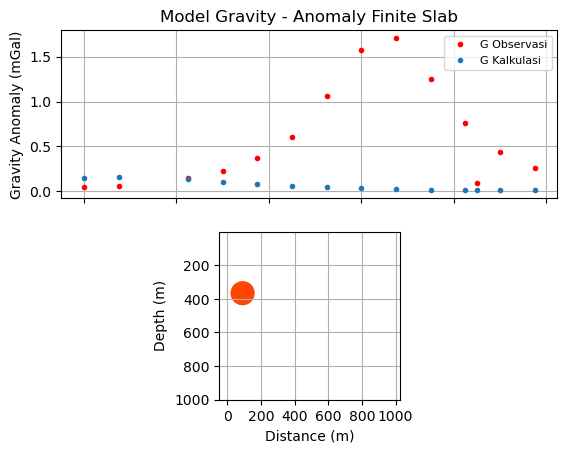

In [115]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(Xi, dobs, "r.", label='G Observasi')
ax1.plot(Xi, dcal, '.', label='G Kalkulasi ')
ax1.legend(loc=1, prop={'size': 8})
ax1.grid()
ax1.set_ylabel("Gravity Anomaly (mGal)")
ax1.set_title("Model Gravity - Anomaly Finite Slab")

circle1=plt.Circle((X_model,Z_model), R_model, color="orangered")
ax2.set_aspect(1)
ax2.add_artist(circle1)
# # ax2.imshow(FS, aspect='auto', extent=[min(xo), max(xo), max(y), min(y)], cmap="Greys")
# ax2.imshow(FS2, aspect='auto', extent=[min(xo), max(xo), max(y), min(y)], cmap="Greys")
ax2.set_xlabel("Distance (m)")
ax2.set_ylabel("Depth (m)")
ax2.set_ylim(1000)
# ax2.set_xlim(980)
ax2.grid()
plt.show()
